# 1 - O que é Overbooking?

> Overbooking é uma expressão em inglês usada para designar quando uma empresa faz uma sobrevenda, ou seja, vende mais do que pode atender. É mais comum em companhias aéreas, mas também pode acontecer em hotéis, shows, eventos esportivos e até salões de beleza ou restaurantes que aceitam cupons pré-pagos.



# 2 - Input.

*   Lugares disponíveis 
*   Probabilidade de ausencia
*   Máximo de overbooking
*   Valor da passagem
*   Valor da multa



3 - Output.
* Tabela
* Médias 
* Gráficos

# 4 - Código para simulação.

In [0]:
import random 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

def gerar_DataFrame(lugares, prob_ausencia, media_simula=True):
  num_simula = 10000
  max_over = 30
  valor_p = 200
  valor_m = -1000
  totas_simulacoes = {"totalVendido": [],"totalPresentes": [],"overbooking": [], 
                "arrecadadoNormal": [],"arrecadadoOver": [],"LiquidoOver": [] ,
                "quantidadeOver": []}
  media_simulacoes = {"QuantidadeOver": [], "LucroMedio": []}

  for qtd_over in range(max_over):
    lucro = []
    for i in range(num_simula):
      total_presentes = 0
      for j in range(1,lugares+qtd_over):
        vl_random = random.uniform(0,1) 
        ausente = 0 if vl_random < prob_ausencia else 1
        total_presentes += ausente
      totas_simulacoes["totalVendido"].append(lugares + qtd_over)
      totas_simulacoes["totalPresentes"].append(total_presentes)
      totas_simulacoes["overbooking"].append(total_presentes - lugares if total_presentes > lugares else 0)
      totas_simulacoes["arrecadadoNormal"].append(lugares*valor_p)
      totas_simulacoes["arrecadadoOver"].append((lugares+qtd_over)*valor_p)
      totas_simulacoes["LiquidoOver"].append((lugares+qtd_over)*valor_p + ((total_presentes - lugares) * valor_m if total_presentes > lugares else 0))
      totas_simulacoes["quantidadeOver"].append(qtd_over)
      lucro.append((lugares+qtd_over)*valor_p + ((total_presentes - lugares) * valor_m if total_presentes > lugares else 0))
    media_simulacoes["QuantidadeOver"].append(qtd_over)
    media_simulacoes["LucroMedio"].append(sum(lucro)/len(lucro))

  
  if (media_simula):
    return pd.DataFrame(media_simulacoes)
  else:
    return pd.DataFrame(totas_simulacoes)

# 5 - Resultados.



> Esses são alguns resultados gerados.

### 5.1.1 Cabeçalho do Data Frame para primeira opção (120 lugares e 10% de probabilidade de não ir).



In [0]:
data1 = gerar_DataFrame(120, 0.1, True)
data1.head()

,QuantidadeOver,LucroMedio
0,0,24000.0
1,1,24200.0
2,2,24400.0
3,3,24599.9
4,4,24799.8


###5.1.2 - Alguns valores importantes. 

In [0]:
data1.describe()

,QuantidadeOver,LucroMedio
count,30.000000,30.000000
mean,14.500000,23231.030000
std,8.803408,2848.553064
min,0.000000,16581.500000
25%,7.250000,21597.075000
50%,14.500000,24435.250000
75%,21.750000,25363.325000
max,29.000000,25893.900000


### 5.1.3 - Gráfico gerado apartir disso, ele mostra até onde é mais lucrativo vender passagens a mais.

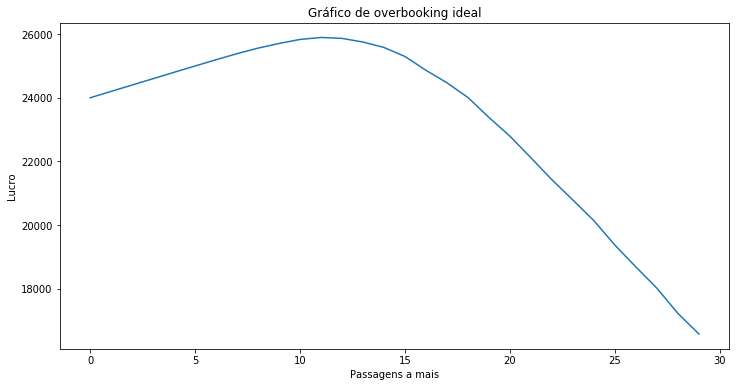

In [0]:
plt.plot(data1["QuantidadeOver"], data1["LucroMedio"])
plt.xlabel('Passagens a mais')
plt.ylabel('Lucro')
plt.title('Gráfico de overbooking ideal',)
plt.show()

### 5.2.1 Cabeçalho do Data Frame para primeira opção (360 lugares e 5% de probabilidade de não ir).



In [0]:
data2 = gerar_DataFrame(360, 0.05, True)
data2.head()

,QuantidadeOver,LucroMedio
0,0,72000.0
1,1,72200.0
2,2,72400.0
3,3,72600.0
4,4,72800.0


###5.2.2 - Alguns valores importantes. 

In [0]:
data2.describe()

,QuantidadeOver,LucroMedio
count,30.000000,30.000000
mean,14.500000,73143.580000
std,8.803408,1504.949544
min,0.000000,69116.100000
25%,7.250000,72413.675000
50%,14.500000,73467.450000
75%,21.750000,74344.400000
max,29.000000,74825.900000


### 5.2.3 - Gráfico gerado apartir disso, ele mostra até onde é mais lucrativo vender passagens a mais.

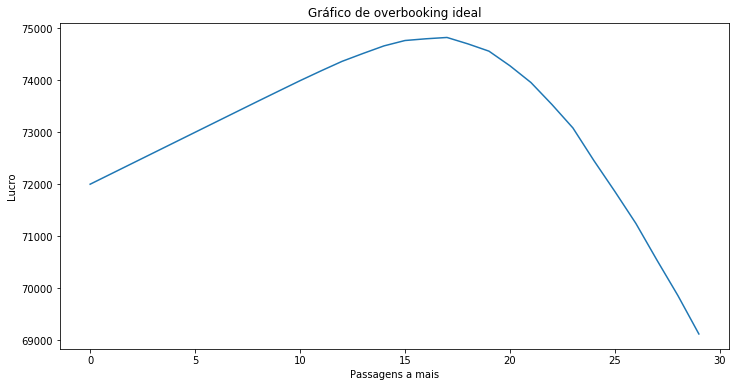

In [0]:
plt.plot(data2["QuantidadeOver"], data2["LucroMedio"])
plt.xlabel('Passagens a mais')
plt.ylabel('Lucro')
plt.title('Gráfico de overbooking ideal',)
plt.show()